In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [64]:
#Import reference LAI data
lai = pd.read_csv('./data/compiled_data_formodel.csv')
lai.head()

,stakes,northing,easting,zones,aspect,slope,watershed,SYear,maxDepth,Stake_ID,...,DIST_M,DBH_IN,DBH_CM,DIST_FT_SD,DIST_M_SD,DBH_IN_SD,DBH_CM_SD,n,prop_Coniferous,Co
0,S200,464819.0,5262240.0,Upland,193.3626,6.632267,S2,2023,70.0,S200,...,5.35432,8.261155,20.983333,4.232415,1.290040,3.001851,7.624701,12,0.000000,7
1,S200,464819.0,5262240.0,Upland,193.3626,6.632267,S2,2024,22.0,S200,...,5.35432,8.261155,20.983333,4.232415,1.290040,3.001851,7.624701,12,0.000000,7
2,S201,464819.0,5262292.0,Upland,115.0966,3.120716,S2,2023,59.0,S201,...,4.48056,9.534121,24.216667,5.262967,1.604152,4.554940,11.569547,18,0.111111,9
3,S201,464819.0,5262292.0,Upland,115.0966,3.120716,S2,2024,18.0,S201,...,4.48056,9.534121,24.216667,5.262967,1.604152,4.554940,11.569547,18,0.111111,9
4,S203,464819.0,5262396.0,Upland,135.0012,7.452870,S2,2023,49.0,S203,...,5.02539,5.725886,14.543750,6.042944,1.841889,1.568753,3.984632,16,0.437500,11


In [65]:
index = 0
mergedData = pd.DataFrame(columns = list(lai.columns) + ['Mean', 'SD'])

In [66]:
for index in range(0, 100):
    #Import data one site at a time
    load_path = './modeloutput/rhino-data-looped/canopyUnion-site-' + str(index) + '.txt'
    dat = pd.read_csv(load_path, header = None, 
                    names = ['Values'])
    
    #Get differences
    dat['delta'] = np.diff(dat['Values'], append = [0])

    #Sort out peaks
    negs = np.where(dat.delta < 0)[0]
    peaks = dat.Values[negs].reset_index(drop = True)

    #Mean and SD values
    meanPeaks = np.nanmean(peaks)
    sdPeaks = np.std(peaks)

    #Write row
    row = lai.iloc[index]
    row['Mean'] = np.nanmean(peaks)
    row['SD'] = np.std(peaks)

    #Save
    mergedData.loc[index] = row

C:\Users\jone3247\AppData\Local\Temp\ipykernel_14804\3730360275.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Mean'] = np.nanmean(peaks)
C:\Users\jone3247\AppData\Local\Temp\ipykernel_14804\3730360275.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Mean'] = np.nanmean(peaks)
C:\Users\jone3247\AppData\Local\Temp\ipykernel_14804\3730360275.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['SD'] = np.std(peaks

In [67]:
mergedData.head()

,stakes,northing,easting,zones,aspect,slope,watershed,SYear,maxDepth,Stake_ID,...,DBH_CM,DIST_FT_SD,DIST_M_SD,DBH_IN_SD,DBH_CM_SD,n,prop_Coniferous,Co,Mean,SD
0,S200,464819.0,5262240.0,Upland,193.3626,6.632267,S2,2023,70.0,S200,...,20.983333,4.232415,1.29004,3.001851,7.624701,12,0.0,7,5.367016,1.299584
1,S200,464819.0,5262240.0,Upland,193.3626,6.632267,S2,2024,22.0,S200,...,20.983333,4.232415,1.29004,3.001851,7.624701,12,0.0,7,5.447996,1.202785
2,S201,464819.0,5262292.0,Upland,115.0966,3.120716,S2,2023,59.0,S201,...,24.216667,5.262967,1.604152,4.55494,11.569547,18,0.111111,9,32.163304,21.63143
3,S201,464819.0,5262292.0,Upland,115.0966,3.120716,S2,2024,18.0,S201,...,24.216667,5.262967,1.604152,4.55494,11.569547,18,0.111111,9,35.339976,19.893483
4,S203,464819.0,5262396.0,Upland,135.0012,7.45287,S2,2023,49.0,S203,...,14.54375,6.042944,1.841889,1.568753,3.984632,16,0.4375,11,36.88893,8.890623


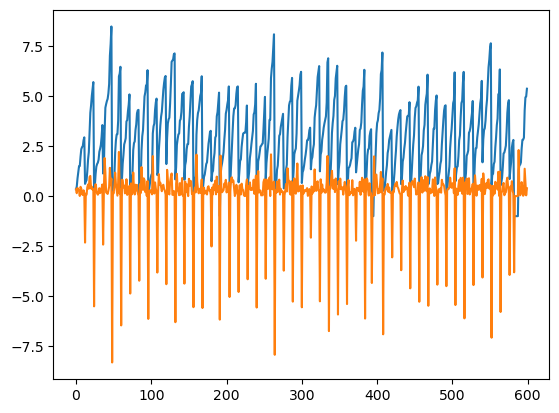

In [21]:
plt.plot(dat.Values)
plt.plot(dat.delta)

In [68]:
#ExportData
mergedData.to_csv('./modeloutput/rhino-data-looped/processedData.csv', index = False)